In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}") 

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
today = pd.Timestamp("2017-07-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-5-30", tz="America/New_York").isoformat()

In [7]:
marketcap = [596707000, 552774000, 1444000000, 7596000000, 2113000000, 872504000, 2781000000, 2695000000, 260639000, 20155000, 841917000]
total_marketcap = [19773696000]
tickers = ["ACB", "AMRS", "APHA", "CGC", "CRON", "GRWG", "GWPH", "IIPR", "OGI", "SNDL", "TLRY"]
ACB_mc = [marketcap[0]/total_marketcap[0]]
AMRS_mc = [marketcap[1]/total_marketcap[0]]
APHA_mc = [marketcap[2]/total_marketcap[0]]
CGC_mc = [marketcap[3]/total_marketcap[0]]
CRON_mc = [marketcap[4]/total_marketcap[0]]
GRWG_mc = [marketcap[5]/total_marketcap[0]]
GWPH_mc = [marketcap[6]/total_marketcap[0]]
IIPR_mc = [marketcap[7]/total_marketcap[0]]
OGI_mc = [marketcap[8]/total_marketcap[0]]
SNDL_mc = [marketcap[9]/total_marketcap[0]]
TLRY_mc = [marketcap[10]/total_marketcap[0]]

print(f"Market weight of ACB is {ACB_mc}")
print(f"Market weight of AMRS is {AMRS_mc}")
print(f"Market weight of APHA is {APHA_mc}")
print(f"Market weight of CGC is {CGC_mc}")
print(f"Market weight of CRON is {CRON_mc}")
print(f"Market weight of GRWG is {GRWG_mc}")
print(f"Market weight of GWPH is {GWPH_mc}")
print(f"Market weight of IIPR is {IIPR_mc}")
print(f"Market weight of OGI is {OGI_mc}")
print(f"Market weight of SNDL is {SNDL_mc}")
print(f"Market weight of TLRY is {TLRY_mc}")

Market weight of ACB is [0.03017680660206367]
Market weight of AMRS is [0.02795501660387618]
Market weight of APHA is [0.07302630727204464]
Market weight of CGC is [0.38414669670252843]
Market weight of CRON is [0.10685913245556117]
Market weight of GRWG is [0.04412447728537953]
Market weight of GWPH is [0.14064138540412474]
Market weight of IIPR is [0.13629217319817197]
Market weight of OGI is [0.013181096745899198]
Market weight of SNDL is [0.0010192833954764957]
Market weight of TLRY is [0.04257762433487396]


In [8]:
timeframe = "1D"

In [9]:
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = end,
 
).df

df_portfolio
df_portfolio.columns = ['ACB open', 'ACB high', 'ACB low', 'ACB close', 'ACB volume', 'AMRS open', 'AMRS high', 'AMRS low', 'AMRS close', 'AMRS volume', 'APHA open', 'APHA high', 'APHA low', 'APHA close', 'APHA volume', 'CGC open', 'CGC high', 'CGC low', 'CGC close', 'CGC volume', 'CRON open', 'CRON high', 'CRON low', 'CRON close', 'CRON volume', 'GRWG open', 'GRWG high', 'GRWG low', 'GRWG close', 'GRWG volume', 'GWPH open', 'GWPH high', 'GWPH low', 'GWPH close', 'GWPH volume', 'IIPR open', 'IIPR high', 'IIPR low', 'IIPR close', 'IIPR volume', 'OGI open','OGI high', 'OGI low', 'OGI close', 'OGI volume', 'SNDL open', 'SNDL high', 'SNDL low', 'SNDL close', 'SNDL volume', 'TLRY open', 'TLRY high', 'TLRY low', 'TLRY close', 'TLRY volume']

df_closing_prices = df_portfolio[['ACB close', 'AMRS close', 'APHA close', 'CGC close', 'CRON close', 'GRWG close', 'GWPH close', 'IIPR close', 'OGI close', 'SNDL close', 'TLRY close']]
df_closing_prices['Index'] = ''

df_closing_prices["Index"] = (ACB_mc * df_portfolio['ACB close']) + (AMRS_mc * df_portfolio['AMRS close'] + (APHA_mc * df_portfolio['APHA close']) + (CGC_mc * df_portfolio['CGC close']) + (CRON_mc * df_portfolio['CRON close']) + (GRWG_mc * df_portfolio['GRWG close']) + (GWPH_mc * df_portfolio['GWPH close']) * (IIPR_mc * df_portfolio['IIPR close']) + (OGI_mc * df_portfolio['OGI close']) +  (SNDL_mc * df_portfolio['SNDL close']) + (TLRY_mc * df_portfolio['TLRY close']))

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,ACB close,AMRS close,APHA close,CGC close,CRON close,GRWG close,GWPH close,IIPR close,OGI close,SNDL close,TLRY close,Index
2017-07-03,NaN,3.2600,4.1600,NaN,NaN,1.910,100.84,16.62,NaN,NaN,NaN,NaN
2017-07-05,NaN,3.2400,4.1500,NaN,NaN,1.920,103.31,16.83,NaN,NaN,NaN,NaN
2017-07-06,NaN,3.2000,4.0868,NaN,NaN,1.990,100.26,16.52,NaN,NaN,NaN,NaN
2017-07-07,NaN,3.3178,4.0169,NaN,NaN,1.904,102.06,16.60,NaN,NaN,NaN,NaN
2017-07-10,NaN,3.3600,4.0407,NaN,NaN,1.940,100.14,16.44,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,16.0001,3.5000,4.0200,19.4200,6.69,6.660,126.72,82.88,1.6450,0.8493,10.2600,211.118830
2020-05-26,15.6050,3.5500,4.2300,20.0200,6.66,6.420,131.43,85.00,1.7300,0.9057,10.7958,224.187860
2020-05-27,15.2700,3.3700,4.1800,19.8527,6.71,6.860,126.50,84.25,1.6900,0.8600,10.6500,214.271697
2020-05-28,15.3400,3.1750,4.3000,21.7600,6.74,6.470,125.62,85.78,1.8687,0.8709,10.3800,217.249658


In [10]:
df_index = df_closing_prices[['Index']]
df_index

,Index
2017-07-03,NaN
2017-07-05,NaN
2017-07-06,NaN
2017-07-07,NaN
2017-07-10,NaN
...,...
2020-05-22,211.118830
2020-05-26,224.187860
2020-05-27,214.271697
2020-05-28,217.249658


Text(0, 0.5, 'Profit in USD')

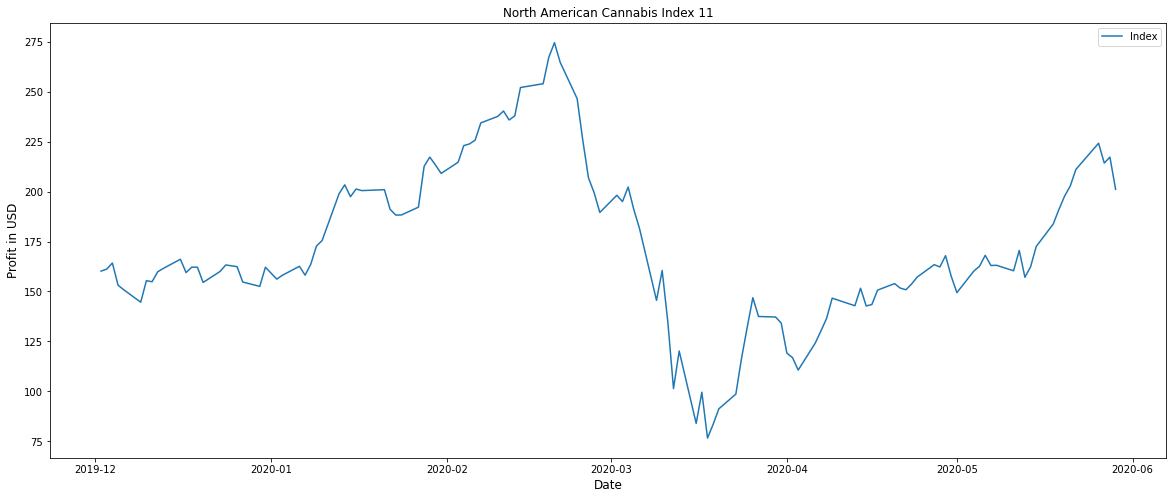

In [63]:
df_index.plot(title="North American Cannabis Index 11", fontsize = (10), figsize=(20,8))
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Profit in USD', fontsize = 12)

In [16]:
df_daily_returns = df_closing_prices.pct_change()

df_daily_returns

,ACB close,AMRS close,APHA close,CGC close,CRON close,GRWG close,GWPH close,IIPR close,OGI close,SNDL close,TLRY close,Index
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,NaN,-0.006135,-0.002404,NaN,NaN,0.005236,0.024494,0.012635,NaN,NaN,NaN,NaN
2017-07-06,NaN,-0.012346,-0.015229,NaN,NaN,0.036458,-0.029523,-0.018419,NaN,NaN,NaN,NaN
2017-07-07,NaN,0.036812,-0.017104,NaN,NaN,-0.043216,0.017953,0.004843,NaN,NaN,NaN,NaN
2017-07-10,NaN,0.012719,0.005925,NaN,NaN,0.018908,-0.018812,-0.009639,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,-0.068006,-0.041096,0.020305,0.064693,0.080775,0.110000,0.009641,0.030333,0.048639,0.415500,0.062112,0.041034
2020-05-26,-0.024694,0.014286,0.052239,0.030896,-0.004484,-0.036036,0.037169,0.025579,0.051672,0.066408,0.052222,0.061904
2020-05-27,-0.021467,-0.050704,-0.011820,-0.008357,0.007508,0.068536,-0.037510,-0.008824,-0.023121,-0.050458,-0.013505,-0.044231
2020-05-28,0.004584,-0.057864,0.028708,0.096073,0.004471,-0.056851,-0.006957,0.018160,0.105740,0.012674,-0.025352,0.013898


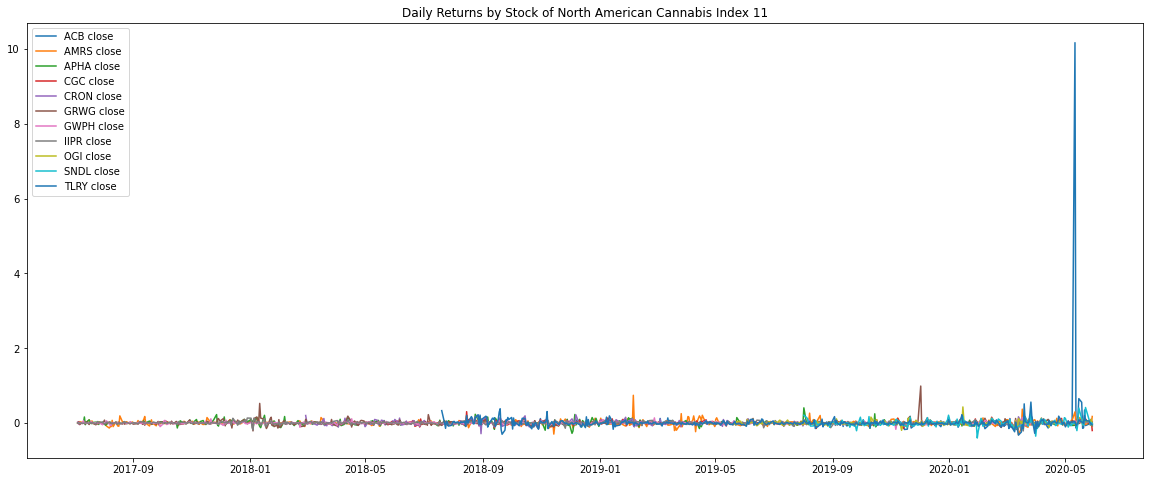

In [56]:
df_daily_returns[['ACB close', 'AMRS close', 'APHA close', 'CGC close', 'CRON close', 'GRWG close', 'GWPH close', 'IIPR close', 'OGI close', 'SNDL close', 'TLRY close']].plot(title="Daily Returns by Stock of North American Cannabis Index 11", figsize=(20,8))

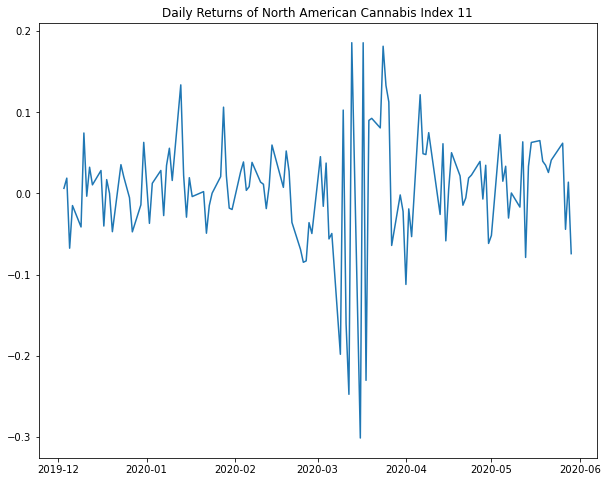

In [48]:
df_dailyreturns_index = df_closing_prices['Index'].pct_change()
df_dailyreturns_index.plot(title = "Daily Returns of North American Cannabis Index 11", figsize = (10,8))

In [49]:
marketcap2 = [552774000, 1444000000, 872504000, 2781000000, 2695000000]
total_marketcap2 = [552774000 + 1444000000 + 872504000 + 2781000000 + 2695000000]
tickers2 = ["AMRS", "APHA", "GRWG", "GWPH", "IIPR"]


AMRS_mc2 = [marketcap2[0]/total_marketcap2[0]]
APHA_mc2 = [marketcap2[1]/total_marketcap2[0]]
GRWG_mc2 = [marketcap2[2]/total_marketcap2[0]]
GWPH_mc2 = [marketcap2[3]/total_marketcap2[0]]
IIPR_mc2 = [marketcap2[4]/total_marketcap2[0]]

print(f"Market weight of AMRS is {AMRS_mc2}")
print(f"Market weight of APHA is {APHA_mc2}")
print(f"Market weight of GRWG is {GRWG_mc2}")
print(f"Market weight of GWPH is {GWPH_mc2}")
print(f"Market weight of IIPR is {IIPR_mc2}")



Market weight of AMRS is [0.06623793719034884]
Market weight of APHA is [0.1730319828770234]
Market weight of GRWG is [0.10455062132142273]
Market weight of GWPH is [0.33324234375415657]
Market weight of IIPR is [0.3229371148570485]


In [50]:
df_portfolio2 = alpaca.get_barset(
    tickers2,
    timeframe,
    start = today,
    end = end,
 
).df

df_portfolio2
df_portfolio2.columns = ['AMRS open', 'AMRS high', 'AMRS low', 'AMRS close', 'AMRS volume', 'APHA open', 'APHA high', 'APHA low', 'APHA close', 'APHA volume', 'GRWG open', 'GRWG high', 'GRWG low', 'GRWG close', 'GRWG volume', 'GWPH open', 'GWPH high', 'GWPH low', 'GWPH close', 'GWPH volume', 'IIPR open', 'IIPR high', 'IIPR low', 'IIPR close', 'IIPR volume']

df_closing_prices2 = df_portfolio2[['AMRS close', 'APHA close', 'GRWG close', 'GWPH close', 'IIPR close']]
df_closing_prices2['Index'] = ''

df_closing_prices2["Index"] = (AMRS_mc * df_portfolio['AMRS close'] + (APHA_mc * df_portfolio['APHA close']) + (GRWG_mc * df_portfolio['GRWG close']) + (GWPH_mc * df_portfolio['GWPH close']) * (IIPR_mc * df_portfolio['IIPR close']))

df_closing_prices2.index = df_closing_prices2.index.date

df_closing_prices2

,AMRS close,APHA close,GRWG close,GWPH close,IIPR close,Index
2017-07-03,3.2600,4.1600,1.910,100.84,16.62,32.604554
2017-07-05,3.2400,4.1500,1.920,103.31,16.83,33.806450
2017-07-06,3.2000,4.0868,1.990,100.26,16.52,32.224104
2017-07-07,3.3178,4.0169,1.904,102.06,16.60,32.944993
2017-07-10,3.3600,4.0407,1.940,100.14,16.44,32.031444
...,...,...,...,...,...,...
2020-05-22,3.5000,4.0200,6.660,126.72,82.88,202.001586
2020-05-26,3.5500,4.2300,6.420,131.43,85.00,214.831267
2020-05-27,3.3700,4.1800,6.860,126.50,84.25,204.990919
2020-05-28,3.1750,4.3000,6.470,125.62,85.78,207.240008


In [51]:
df_index2 = df_closing_prices2[['Index']]
df_index2

,Index
2017-07-03,32.604554
2017-07-05,33.806450
2017-07-06,32.224104
2017-07-07,32.944993
2017-07-10,32.031444
...,...
2020-05-22,202.001586
2020-05-26,214.831267
2020-05-27,204.990919
2020-05-28,207.240008


Text(0, 0.5, 'Profit')

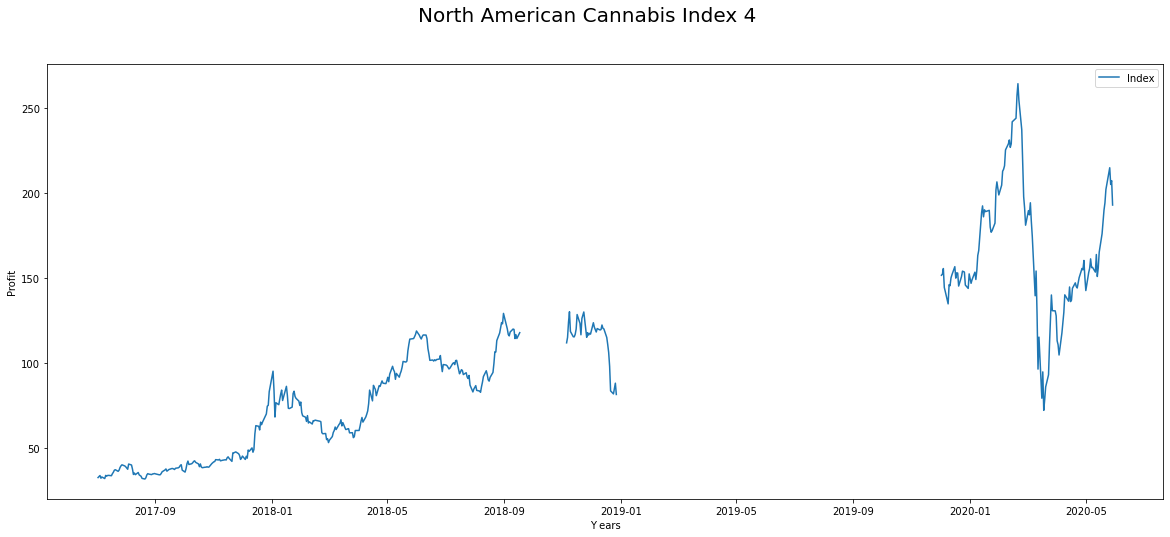

In [55]:
df_index2.plot(figsize=(20,8))
plt.suptitle('North American Cannabis Index 4', fontsize=20)
plt.xlabel('Y ears', fontsize = 10)
plt.ylabel('Profit')

In [53]:
ci4mi = df_closing_prices2[['AMRS close', 'APHA close', 'GRWG close', 'GWPH close', 'IIPR close']].pct_change()
ci4mi

,AMRS close,APHA close,GRWG close,GWPH close,IIPR close
2017-07-03,NaN,NaN,NaN,NaN,NaN
2017-07-05,-0.006135,-0.002404,0.005236,0.024494,0.012635
2017-07-06,-0.012346,-0.015229,0.036458,-0.029523,-0.018419
2017-07-07,0.036812,-0.017104,-0.043216,0.017953,0.004843
2017-07-10,0.012719,0.005925,0.018908,-0.018812,-0.009639
...,...,...,...,...,...
2020-05-22,-0.041096,0.020305,0.110000,0.009641,0.030333
2020-05-26,0.014286,0.052239,-0.036036,0.037169,0.025579
2020-05-27,-0.050704,-0.011820,0.068536,-0.037510,-0.008824
2020-05-28,-0.057864,0.028708,-0.056851,-0.006957,0.018160


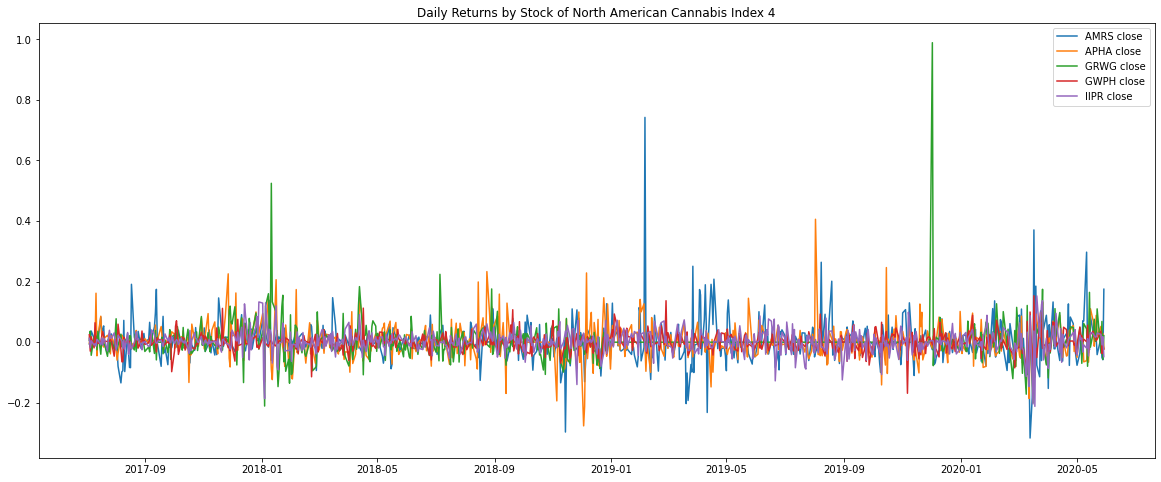

In [57]:
ci4mi.plot(title="Daily Returns by Stock of North American Cannabis Index 4", figsize=(20,8))